For explanations on boxplots, see:

   https://en.wikipedia.org/wiki/Box_plot
   
   http://www.r-graph-gallery.com/portfolio/boxplot/
   
   http://t-redactyl.io/blog/2016/04/creating-plots-in-r-using-ggplot2-part-10-boxplots.html

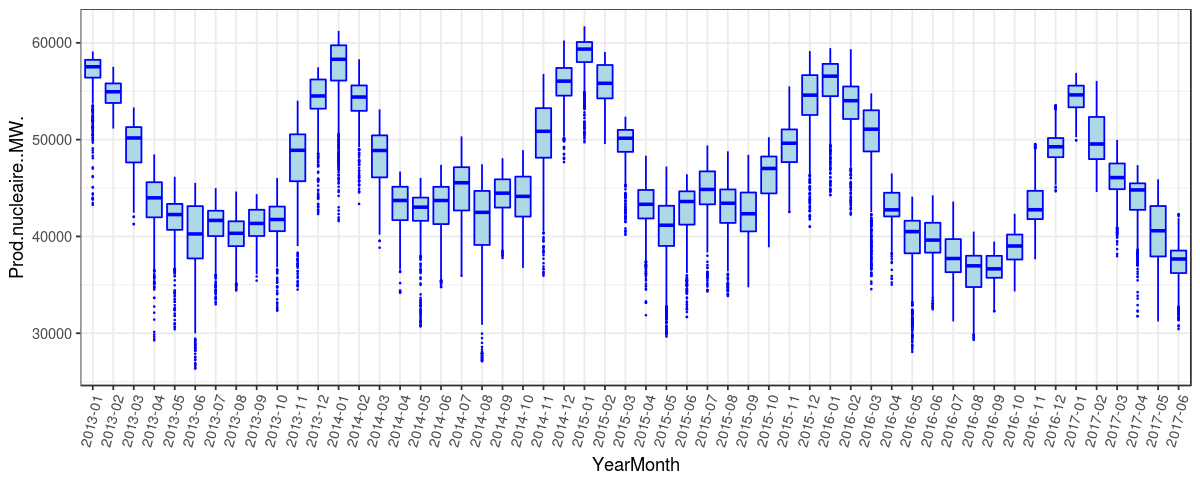

In [16]:
library(ggplot2)
library(scales)

ds = read.csv("cdc_prod_par_filiere.csv", sep = ";")
#summary(ds)
#str(ds)

ds$YearMonth <- substr(ds$Date, start=1, stop=7) 
ds$YearMonth <- factor(ds$YearMonth)
ds$Year <- substr(ds$Date, start=1, stop=4)

#ds

#ds <- ds[which(ds$Year=="2013" | ds$Year=="2014"),]

options(repr.plot.width=10, repr.plot.height=4)

ggplot(data=ds, aes(x=YearMonth, y=Prod.nucleaire..MW.))+
  geom_boxplot(fill = "lightblue", colour = "blue", outlier.size=0.1)+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 75, hjust = 1))
  

'data.frame':	157632 obs. of  6 variables:
 $ Date     : Factor w/ 1642 levels "2013-01-01","2013-01-02",..: 14 15 14 14 14 14 15 14 14 14 ...
 $ Heure    : Factor w/ 48 levels "00:00","00:30",..: 28 20 32 38 31 36 14 25 39 23 ...
 $ Prod     : int  83193 86233 81806 87139 82031 85283 78882 84483 88854 84489 ...
 $ Type     : Factor w/ 2 levels "Nucl","Tot": 2 2 2 2 2 2 2 2 2 2 ...
 $ YearMonth: Factor w/ 54 levels "2013-01","2013-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year     : Factor w/ 5 levels "2013","2014",..: 1 1 1 1 1 1 1 1 1 1 ...


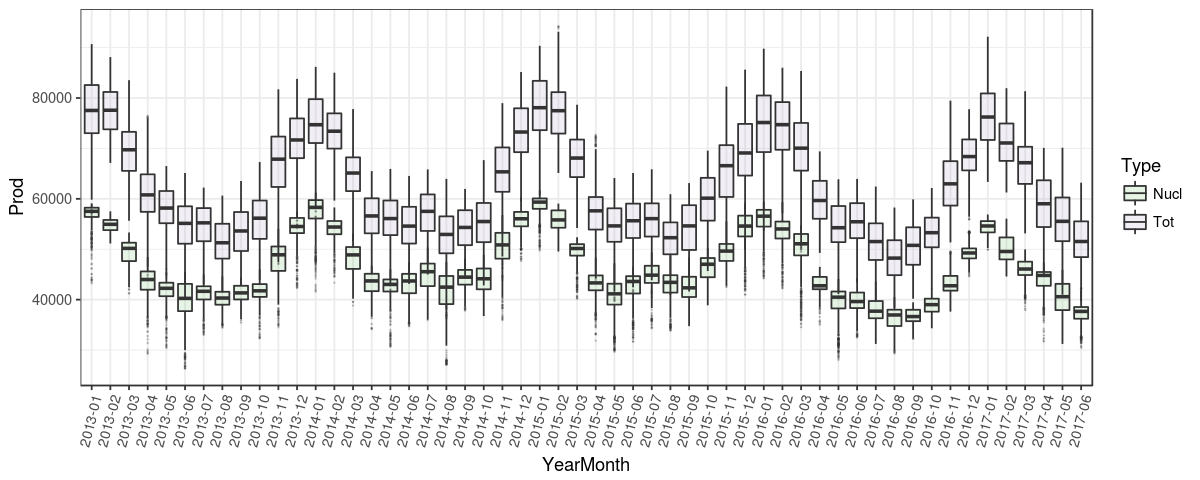

In [10]:
library(ggplot2)
library(scales)

ds = read.csv("cdc_prod_par_filiere.csv", sep = ";")

dsTot <- data.frame(ds$Date, ds$Heure, ds$Prod.totale..MW.)
dsTot$Type <- "Tot"
colnames(dsTot) <- c("Date", "Heure", "Prod", "Type")
dsNucl <- data.frame(ds$Date, ds$Heure, ds$Prod.nucleaire..MW.)
dsNucl$Type <- "Nucl"
colnames(dsNucl) <- c("Date", "Heure", "Prod", "Type")

newds <- rbind(dsTot, dsNucl)
newds$Type <- factor(newds$Type)
newds$YearMonth <- substr(newds$Date, start=1, stop=7) 
newds$YearMonth <- factor(newds$YearMonth)
newds$Year <- substr(ds$Date, start=1, stop=4)#as.numeric(substr(ds$Date, start=1, stop=4))
newds$Year <- factor(newds$Year)
str(newds)
#newds
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data=newds, aes(x=YearMonth, y=Prod, fill=Type))+
  geom_boxplot(outlier.size=0.1, alpha=0.2, position = "identity")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 75, hjust = 1)) +
        scale_fill_brewer(palette = "Accent")
  